In [1]:
import pandas as pd
import numpy as np

In [2]:
# import ml classifiers
from nltk.tokenize import sent_tokenize # tokenizes sentences
from nltk.stem import PorterStemmer     # parsing/stemmer
from nltk.tag import pos_tag            # parts-of-speech tagging
from nltk.corpus import wordnet         # sentiment scores
from nltk.stem import WordNetLemmatizer # stem and context
from nltk.corpus import stopwords       # stopwords
from nltk.util import ngrams

In [3]:
df = pd.read_csv('spotify_final.csv').iloc[:, 1:]
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,Season,Name Length,live,love,mix,no,op,remast,version,year_y
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,NaN,6,0,0,0,0,0,0,0,0
1,0.643000,"['""Screamin Jay Hawkins""']",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,...,Winter,6,0,0,0,0,0,0,0,0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,NaN,2,0,0,0,0,0,0,0,0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,Winter,10,0,0,0,0,0,0,0,0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Fall,1,0,0,0,0,0,0,0,0


In [4]:
df.shape

(174389, 30)

In [5]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,Collaboration,Name Length,live,love,mix,no,op,remast,version,year_y
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,...,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,...,0.215392,4.673099,0.029870,0.036034,0.024766,0.027261,0.024503,0.066145,0.024451,0.023688
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,...,0.411095,3.301915,0.172105,0.190515,0.169057,0.174373,0.155160,0.248583,0.155371,0.152942
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,...,1.000000,44.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [6]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year_x', 'Collaboration', 'Season', 'Name Length', 'live',
       'love', 'mix', 'no', 'op', 'remast', 'version', 'year_y'],
      dtype='object')

In [7]:
# Delete some of the columns
del df['id']
del df['release_date']
del df['artists']

In [8]:
# Change some of the column names
df = df.rename(columns={'Name Length': 'name_length'})
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,Season,name_length,live,love,mix,no,op,remast,version,year_y
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,...,NaN,6,0,0,0,0,0,0,0,0
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,...,Winter,6,0,0,0,0,0,0,0,0
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,...,NaN,2,0,0,0,0,0,0,0,0
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,...,Winter,10,0,0,0,0,0,0,0,0
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,...,Fall,1,0,0,0,0,0,0,0,0


In [9]:
# Get the dummy variables for season
#dummy variable for season
season_dum = pd.get_dummies(df['Season'])
df['Season'] = season_dum

In [10]:
# Create the final dataset
df["Season"]

0         0
1         0
2         0
3         0
4         1
         ..
174384    0
174385    0
174386    0
174387    0
174388    0
Name: Season, Length: 174389, dtype: uint8

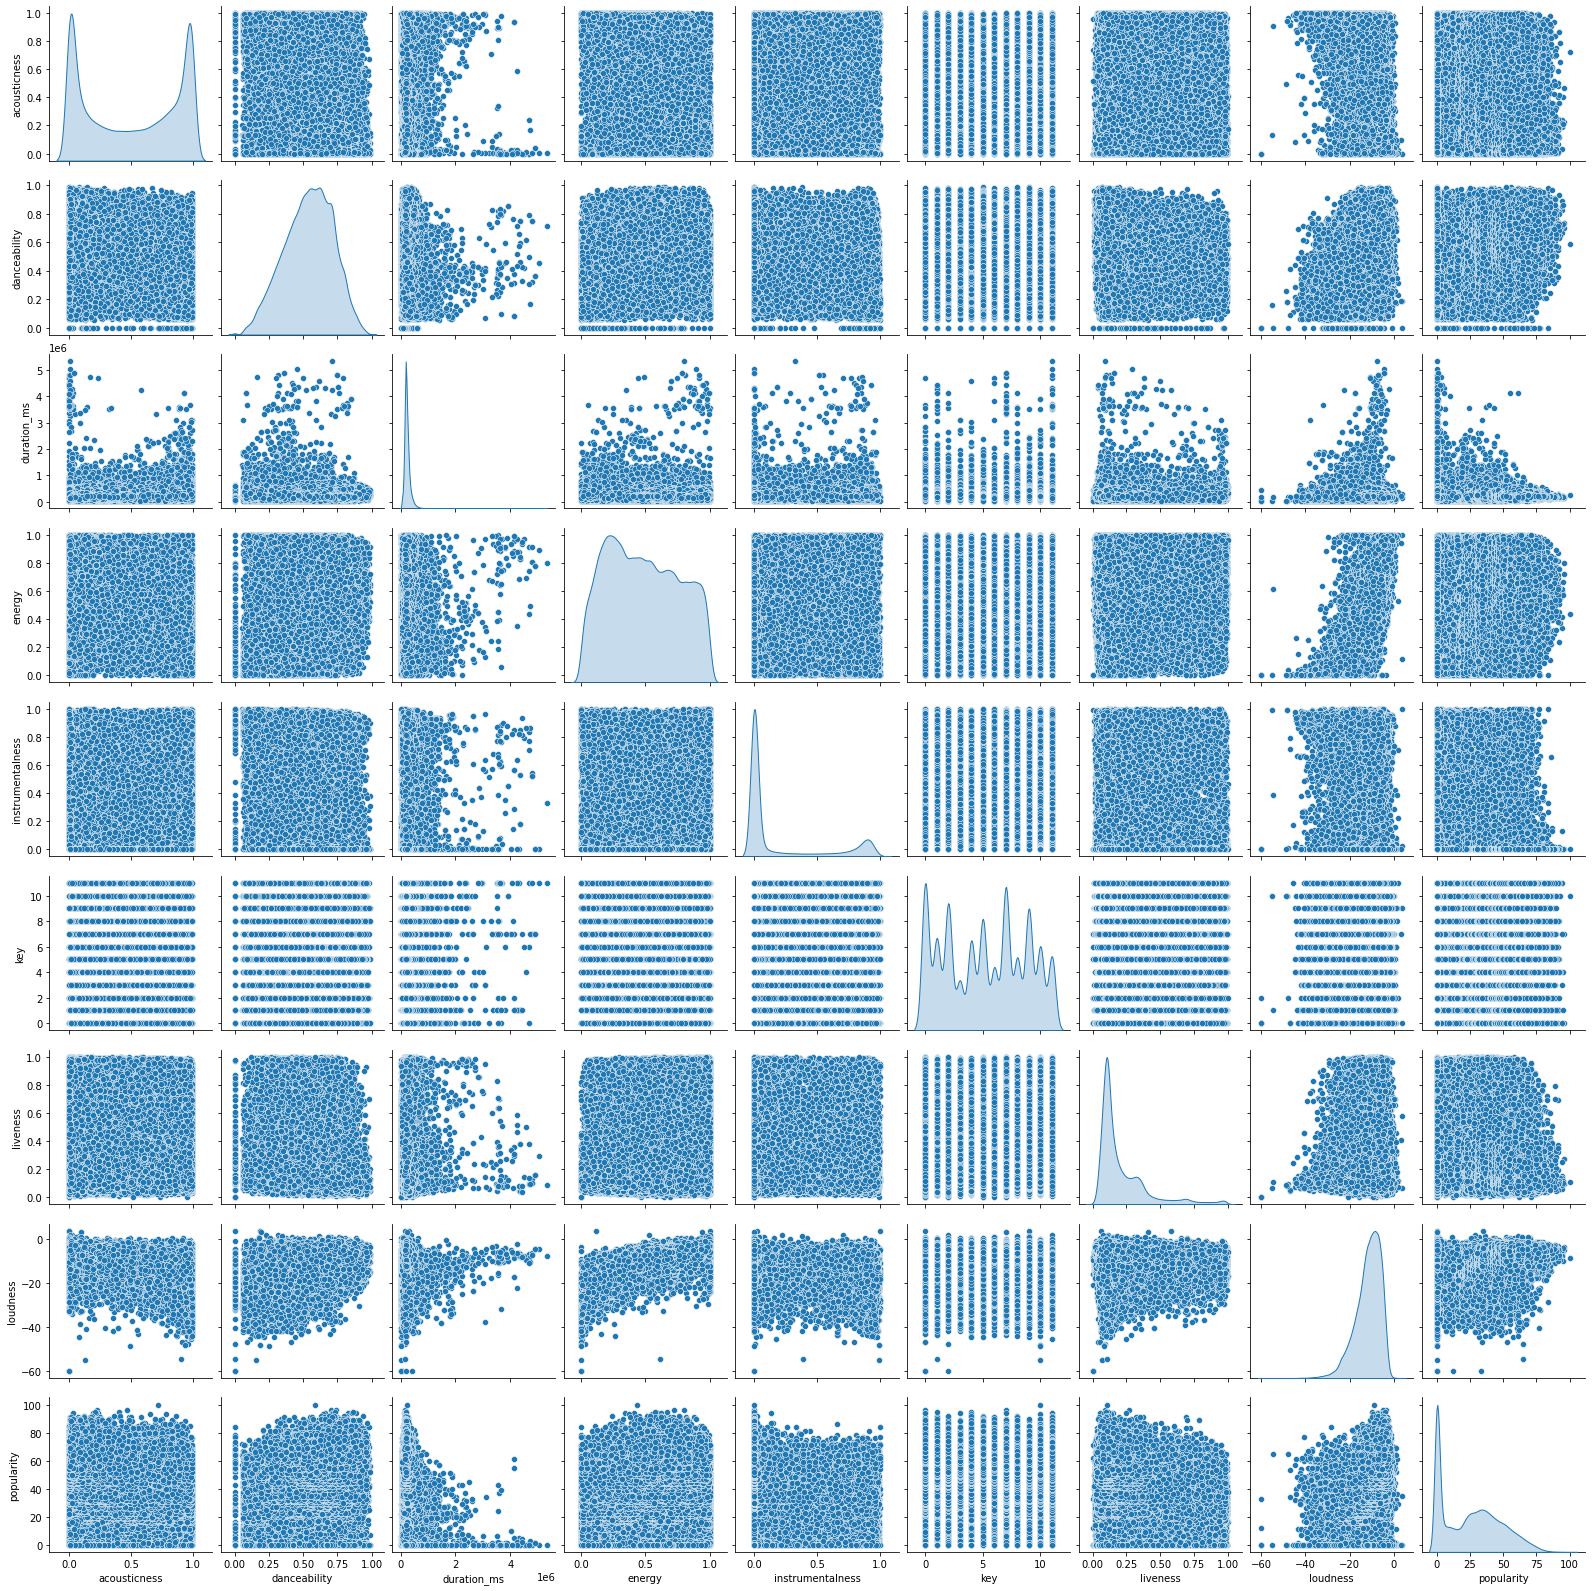

In [11]:
# Plot scatter matrix for each pair of variables off diagonal and the histograms (or density plots) on the diagonal
# In ggplot2 in R, one can use ggscatmat, which also prints the correlation in the upper triangle.
import seaborn as sns

cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness','popularity']
sns.pairplot(df[cols],diag_kind='kde') 

## Building CART Model

### Predict if the song is good
* A song is good if its popularity is greater than 25

In [12]:
from sklearn.model_selection import train_test_split
cols = ['acousticness', 'danceability', 'duration_ms', 'energy','explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 
       'tempo', 'valence', 'year_x', 'Collaboration', 'name_length', 'live',
        'live','love', 'mix', 'no', 'op', 'remast', 'version', 'year_y', 
       'Season', 'popularity']

# re-split the dataset into training and testing data
y = df['popularity']
X = df[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)
blend_df = X_test.reset_index()[cols]
X_train = X_train.drop(columns=["popularity"])
X_test = X_test.drop(columns=["popularity"])

X_train.shape, X_test.shape

((116840, 26), (57549, 26))

In [13]:
y_train.mean(), y_train.max(), y_train.min()

(25.67584731256419, 100, 0)

(array([3.9388e+04, 1.0138e+04, 1.5827e+04, 1.8036e+04, 1.4227e+04,
        1.0394e+04, 6.0360e+03, 2.3960e+03, 3.7000e+02, 2.8000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

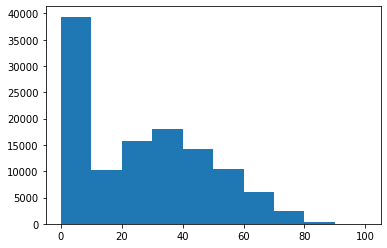

In [14]:
import matplotlib.pyplot as plt
plt.hist(y_train)

In [15]:
# convert the popularity to be 0 or 1
# 0 if the score is less than 85, else 1
y_train=pd.Series([1 if y_train.iloc[i]>=25 else 0 for i in range(len(y_train))], index=y_train.index)
y_test=pd.Series([1 if y_test.iloc[i]>=25 else 0 for i in range(len(y_test))], index=y_test.index)
blend_df['popularity']=pd.Series([1 if blend_df['popularity'].iloc[i]>=25 else 0 for i in range(len(blend_df['popularity']))], index=blend_df['popularity'].index)


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 51)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

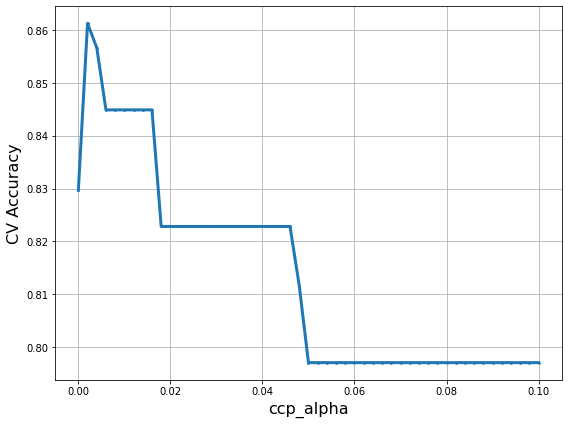

Best ccp_alpha {'ccp_alpha': 0.002}


In [17]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 23


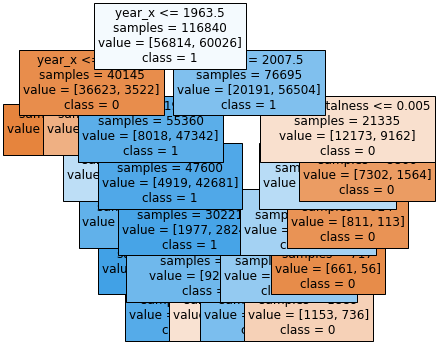

In [18]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Compute the performance of the training set
y_pred_cart = dtc_cv.predict(X_test)

cm = confusion_matrix(y_test, y_pred_cart)

print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_cart))
print ("\nPrecision:", precision_score(y_test, y_pred_cart))

Confusion Matrix: 
 [[23145  4872]
 [ 3228 26304]]

Accuracy: 0.8592503779388

Precision: 0.8437259430331023


In [20]:
# The performance of the test set
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[23145  4872]
 [ 3228 26304]]

Accuracy: 0.8592503779388


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.8min finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [22]:
# Evaluate the model performance on the testing set
y_prob_rf = rf.predict(X_test)
y_pred_rf = pd.Series([1 if x >= 0.5 else 0 for x in y_prob_rf])
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Confusion Matrix : 
 [[23145  4872]
 [ 3228 26304]]

Accuracy: 0.8592503779388


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    7.6s finished


## Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
import time

tic = time.time()

gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

time: 42.63 s


In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_boost = gbc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)

print ("\nAccuracy:", accuracy_score(y_test, y_pred))
tn, fp, fn, tp = cm.ravel()
rf_cv_tpr = tp / (tp + fn)
rf_cv_fpr = fp / (fp + tn)
rf_cv_acc = (tp + tn) / (tp + tn + fn + fp)
print(rf_cv_tpr)
print(rf_cv_acc)

Confusion Matrix: 
 [[23145  4872]
 [ 3228 26304]]

Accuracy: 0.8592503779388
0.8906948394961398
0.8592503779388


## Logistic Model

In [25]:
X_train.corr

<bound method DataFrame.corr of         acousticness  danceability  duration_ms  energy  explicit  \
43437          0.984         0.404       194505  0.1640         0   
160745         0.994         0.301       180827  0.1160         0   
123806         0.703         0.511       193440  0.6320         0   
126495         0.114         0.721       339345  0.9030         1   
59850          0.993         0.647       171360  0.1620         0   
...              ...           ...          ...     ...       ...   
90474          0.104         0.652       286800  0.6300         1   
133553         0.135         0.393       198120  0.4190         0   
36815          0.231         0.454       352500  0.5340         0   
104736         0.158         0.332       313933  0.2790         0   
124888         0.950         0.176       185347  0.0302         0   

        instrumentalness  key  liveness  loudness  mode  ...  live  live  \
43437           0.073400    7    0.2110   -12.411     0  ...   

In [26]:
import statsmodels.api as smf
#building model and fitting data
log_reg = smf.Logit(np.asarray(y_train), np.asarray(X_train)).fit()

#visualize summary. Can drop columns x1, x4, x15 since coef are minimal
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.521484
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:               116840
Model:                          Logit   Df Residuals:                   116815
Method:                           MLE   Df Model:                           24
Date:                Wed, 12 May 2021   Pseudo R-squ.:                  0.2472
Time:                        13:56:51   Log-Likelihood:                -60930.
converged:                       True   LL-Null:                       -80943.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.0930        nan        nan        nan         nan         nan
x2             0.0358      0.

/opt/conda/lib/python3.8/site-packages/statsmodels/base/model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))


In [27]:
#define y_hat as the predicted value of y for test dataset
y_hat = log_reg.predict(X_test)
prediction = list(map(round, y_hat))

from sklearn.metrics import (confusion_matrix,
                            accuracy_score)

#confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion matrixx : \n", cm)

Confusion matrixx : 
 [[19947  8070]
 [ 6158 23374]]


In [28]:
#accuracy of the model
print('Test Accuracy = ', accuracy_score(y_test, prediction))

Test Accuracy =  0.7527672070757094


## LDA

In [29]:
#lda model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_prob_lda = lda.predict_proba(X_test)
y_pred_lda = pd.Series([1 if x > .5 else 0 for x in y_prob_lda[:,1]])


cm = confusion_matrix(y_test, y_pred_lda)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred_lda))

Confusion Matrix: 
 [[20406  7611]
 [ 4585 24947]]

Accuracy: 0.7880762480668647


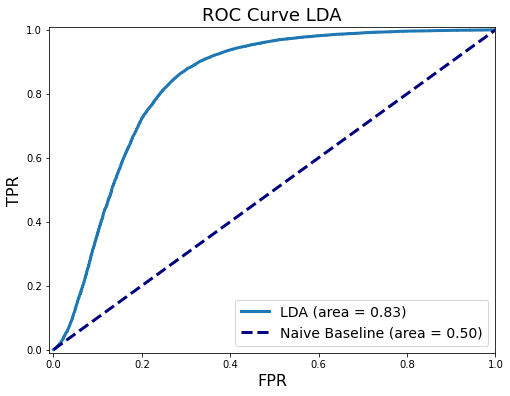

In [30]:
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_prob_lda[:,1])
roc_auc_lda = auc(fpr_lda, tpr_lda)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve LDA', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lda, tpr_lda, lw=3, label='LDA (area = {:0.2f})'.format(roc_auc_lda))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.savefig("roc_lda.png", bbox_inches='tight', dpi=600)
plt.show()

## Blending

In [31]:
blend_df["val_pred_log"]=prediction
blend_df["val_pred_rf"]=y_pred_rf
blend_df["val_pred_boost"]=y_pred_boost
blend_df["val_pred_lda"]=y_pred_lda
blend_df["val_pred_cart"]=y_pred_cart

In [32]:
import statsmodels.formula.api as smf

blending_ols = smf.ols(formula='popularity ~ val_pred_log+val_pred_lda+val_pred_rf+val_pred_boost', data=blend_df)
blending_res = blending_ols.fit()
print(blending_res.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                 2.150e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        13:56:55   Log-Likelihood:                -15444.
No. Observations:               57549   AIC:                         3.090e+04
Df Residuals:                   57544   BIC:                         3.094e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0734      0.002     34.

In [33]:
val_pred_blended =blending_res.predict(blend_df)
blend_df['pred_blended']= val_pred_blended
blend_df

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,version,year_y,Season,popularity,val_pred_log,val_pred_rf,val_pred_boost,val_pred_lda,val_pred_cart,pred_blended
0,0.000326,0.306,376360,0.268,0,0.829000,7,0.1060,-18.097,1,...,0,0,0,1,1,1,1,1,1,0.886818
1,0.000008,0.445,257160,0.876,0,0.715000,11,0.3810,-6.549,1,...,0,0,0,0,1,0,0,1,0,0.170229
2,0.198000,0.497,46811,0.691,0,0.935000,7,0.1030,-10.812,0,...,0,1,0,0,0,0,0,0,0,0.073431
3,0.464000,0.749,232800,0.546,0,0.001910,8,0.1260,-7.217,0,...,1,0,0,1,1,1,1,1,1,0.886818
4,0.008820,0.844,405707,0.442,0,0.000498,9,0.0879,-16.540,1,...,0,0,0,1,1,1,1,1,1,0.886818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57544,0.164000,0.674,186747,0.578,0,0.000000,4,0.1030,-10.919,1,...,0,0,0,1,1,1,1,1,1,0.886818
57545,0.337000,0.549,184667,0.460,0,0.000003,1,0.1100,-11.343,1,...,0,0,0,1,1,1,1,1,1,0.886818
57546,0.404000,0.401,424000,0.943,0,0.949000,0,0.0933,-4.441,1,...,0,0,0,1,0,1,1,1,1,0.843781
57547,0.900000,0.181,266973,0.241,0,0.000002,10,0.0808,-11.626,1,...,0,1,0,1,0,0,0,0,0,0.073431


In [34]:
def masked_mae(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(np.abs(masked_diff))

def masked_mse(X_true, X_pred, mask):
    masked_diff = X_true[mask] - X_pred[mask]
    return np.mean(masked_diff ** 2)

def OSR2(mse_model, mse_baseline):
    return 1 - mse_model/mse_baseline

In [36]:
val_mae_blended = np.mean(np.abs(blend_df["popularity"] - val_pred_blended))
print("Normalized MAE %s " % (val_mae_blended/100))

val_mae_blended = np.mean(np.abs(blend_df["popularity"] - val_pred_blended))
print("MAE %s " % (val_mae_blended))

val_mse_blended = np.mean((blend_df["popularity"] - val_pred_blended)**2)
print("Normalized RMSE %s " % (np.sqrt(val_mse_blended/100)))

val_mse_blended = np.mean((blend_df["popularity"] - val_pred_blended)**2)
print("RMSE %s " % (np.sqrt(val_mse_blended)))

Normalized MAE 0.002002855493548226 
MAE 0.2002855493548226 
Normalized RMSE 0.03164534320834753 
RMSE 0.3164534320834753 
